In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('./creditcard-data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# Display a concise summary of the DataFrame df, including column names, non-null counts...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
# Print the shape of the dataset (number of rows and columns)
print('Shape Of The Dataset', df.shape)

# Print the unique class categories in the 'Class' column
print('Class Categories', df['Class'].unique())

# Print the number of records with the class value 0 in the 'Class' column
print('Number Of Records With The Class Value 0: ', (df.Class == 0).sum())

# Print the number of records with the class value 1 in the 'Class' column
print('Number Of Records With The Class Value 1: ', (df.Class == 1).sum())

Shape Of The Dataset (284807, 31)
Class Categories [0 1]
Number Of Records With The Class Value 0:  284315
Number Of Records With The Class Value 1:  492


c:\Users\hilmi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hilmi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\hilmi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Class', ylabel='count'>

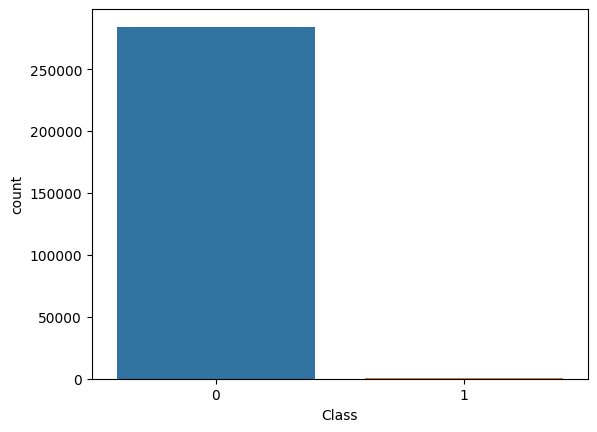

In [10]:
# Create a count plot to visualize the distribution of classes in the 'Class' column of the DataFrame df
sns.countplot(x='Class', data=df)

Credit card fraud datasets, including this one, are typically highly imbalanced because occurrences of fraud are rare compared to normal transactions.

#### Feature Selection

Test ANOVA : 

*Interpret the Results* : F-scores indicate the variance between groups relative to the variance within groups. P-values indicate if this variance is significant.

- High F-score: Indicates a strong relationship between the feature and the target variable.
- Low p-value (typically < 0.05): Indicates that the relationship is statistically significant.

*Select Features* : Choose features with the highest F-scores and the lowest p-values.

In [12]:
from sklearn.feature_selection import f_classif

X = df.drop(columns=['Class'])
y = df['Class']

# Calculate F-scores and p-values
F, p_values = f_classif(X, y)

# Create a DataFrame to display the results
features_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': F, 'p-value': p_values})

# Sort features by F-Score (from highest to lowest)
features_scores = features_scores.sort_values(by='F-Score', ascending=False)

# Display the results
features_scores

,Feature,F-Score,p-value
17,V17,33979.168593,0.000000e+00
14,V14,28695.547788,0.000000e+00
12,V12,20749.822361,0.000000e+00
10,V10,14057.979985,0.000000e+00
16,V16,11443.349428,0.000000e+00
3,V3,11014.508305,0.000000e+00
7,V7,10349.605408,0.000000e+00
11,V11,6999.355047,0.000000e+00
4,V4,5163.832114,0.000000e+00
18,V18,3584.380605,0.000000e+00


### Handling Data Imbalance

In [19]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# Show the original class distribution
print('Original class distribution:', Counter(y))

# We reduce class 0 to 10% of its original size.
undersample = RandomUnderSampler(sampling_strategy={0: int(len(y[y == 0]) * 0.1), 1: len(y[y == 1])})

# Apply the undersampler to the data
X_resampled, y_resampled = undersample.fit_resample(X, y)

# Show the new class distribution
print('Resampled class distribution:', Counter(y_resampled))


Original class distribution: Counter({0: 284315, 1: 492})
Resampled class distribution: Counter({0: 28431, 1: 492})


### Initial Exploration of Models Performance Using All Features

##### The LazyClassifier :

The LazyClassifier is a tool from the Python library lazypredict that provides a quick and easy way to train and compare multiple classification models without the need to write extensive code. It allows you to benchmark the performance of various classifiers with default hyperparameters, helping you to quickly identify which models might work best for your dataset.

##### Key Features of LazyClassifier : 
- Ease of Use: Requires minimal code to train multiple models.
- Quick Comparison: Provides a summary of model performance metrics, such as accuracy, F1 score, and ROC AUC.
- Time-Saving: Helps in the initial phase of model selection by automating the training and evaluation process for many models at once.

In [20]:
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Fit all models
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(x_train, x_test, y_train, y_test)
models

 41%|████▏     | 12/29 [05:12<21:30, 75.92s/it]